In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pprint import pprint

In [3]:
data_df=pd.read_csv("Google-Playstore-Full.csv",low_memory=False)
data_df=data_df[["App Name","Category","Rating","Reviews","Installs","Size","Price","Content Rating"]]
data_df.dropna()
data_df=data_df.rename(columns={"App Name":"App_Name"})
data_df

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922,"100,000,000+",Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone
...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone
267048,Pet ads: Buy & Sell,BUSINESS,2.599999905,5,500+,8.4M,0,Everyone
267049,Collectors Market: Buy & Sell,BUSINESS,3.285714388,7,"1,000+",7.9M,0,Everyone
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone


DATA CLEANING

In [4]:
#clean raw data
data_df=data_df[~data_df.App_Name.str.contains("?",na=False,regex=False)]

In [5]:
# clean price
cleaned_df = data_df
cleaned_df=cleaned_df[~cleaned_df.Price.str.contains("M",na=False,regex=False)]
cleaned_df=cleaned_df[~cleaned_df.Price.str.contains("+",na=False,regex=False)]
cleaned_df = cleaned_df[cleaned_df["Price"] != 'Varies with device']
cleaned_df["Price"] = cleaned_df["Price"].str.replace("$","").astype(float)

In [6]:
#clean install number
cleaned_df = cleaned_df[cleaned_df["Installs"] != 'EDUCATION']
cleaned_df = cleaned_df[cleaned_df["Installs"] != ' Xmax X']
cleaned_df["Installs"] = cleaned_df['Installs'].str.split("+").str[0]
cleaned_df["Installs"] = cleaned_df["Installs"].replace(',', "", regex=True)
cleaned_df["Installs"] = cleaned_df["Installs"].astype(float)

In [7]:
# clean rating
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'NEWS_AND_MAGAZINES']
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'GAME_STRATEGY']
cleaned_df["Rating"] = cleaned_df["Rating"].astype(float)
cleaned_df.head()

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034,5000000.0,Varies with device,0.00,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922,100000000.0,Varies with device,0.00,Everyone
2,Peapod,SHOPPING,3.656329,1967,100000.0,1.4M,0.00,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154,10000000.0,16M,0.00,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291,10000.0,Varies with device,5.99,Everyone


In [8]:
#Clean Category
cleaned_df["Category"]=cleaned_df["Category"].replace('_', ' ', regex=True)

In [9]:
#Clean Reviews
cleaned_df["Reviews"]=cleaned_df["Reviews"].astype(float)

In [10]:
#finish data cleaning 
cleaned_df=cleaned_df.rename(columns={"App_Name":"App Name"})
value_counts = cleaned_df["Category"].value_counts()
to_remove = value_counts[value_counts <= 1].index
cleaned_df= cleaned_df[~cleaned_df.Category.isin(to_remove)]

In [11]:
# cleaned_df1 is for general categories
cleaned_df1 = cleaned_df.replace(
    {"GAME PUZZLE": "GAME",
"GAME CASUAL": "GAME",
"GAME ARCADE": "GAME",
"GAME ACTION": "GAME",
"GAME SIMULATION": "GAME",
"GAME CARD": "GAME",
"GAME EDUCATIONAL": "GAME",
"GAME ROLE PLAYING": "GAME",
"GAME STRATEGY": "GAME",
"GAME RACING": "GAME",
"GAME ADVENTURE": "GAME",
"GAME SPORTS": "GAME",
"GAME WORD": "GAME",
"GAME BOARD": "GAME",
"GAME CASINO": "GAME",
"GAME TRIVIA": "GAME",
"GAME MUSIC": "GAME",
})
cleaned_df1["Category"].value_counts()

EDUCATION              26886
GAME                   20663
TOOLS                  19817
ENTERTAINMENT          17191
BOOKS AND REFERENCE    15169
MUSIC AND AUDIO        14099
LIFESTYLE              11576
PERSONALIZATION        10199
BUSINESS                9186
FINANCE                 8869
PRODUCTIVITY            8514
PHOTOGRAPHY             6782
NEWS AND MAGAZINES      6756
HEALTH AND FITNESS      6654
TRAVEL AND LOCAL        5807
SPORTS                  5034
COMMUNICATION           4835
SHOPPING                3924
SOCIAL                  3856
MAPS AND NAVIGATION     3513
MEDICAL                 3291
FOOD AND DRINK          2468
VIDEO PLAYERS           2420
AUTO AND VEHICLES       1752
ART AND DESIGN          1604
WEATHER                 1501
BEAUTY                   746
HOUSE AND HOME           740
EVENTS                   548
LIBRARIES AND DEMO       477
PARENTING                444
COMICS                   397
DATING                   256
Name: Category, dtype: int64

Top Install Apps

In [12]:
Top_5_install_app = cleaned_df1.sort_values(by='Installs', ascending=False).loc[:,('App Name', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_install_app = Top_5_install_app.drop(['index'], axis=1)
Top_5_install_app.head(5)

,App Name,Category,Rating,Reviews,Installs
0,Maps - Navigate & Explore,TRAVEL AND LOCAL,4.342798,10083666.0,5.000000e+09
1,YouTube,VIDEO PLAYERS,4.368428,41919102.0,5.000000e+09
2,Google,TOOLS,4.408893,10870728.0,5.000000e+09
3,Gmail,COMMUNICATION,4.346980,5614163.0,1.000000e+09
4,Messenger � Text and Video Chat for Free,COMMUNICATION,4.085856,65469531.0,1.000000e+09


Top Rated Apps

In [13]:
Top_5_Rating_app = cleaned_df1.sort_values(by='Rating', ascending=False).loc[:,('App Name', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_Rating_app = Top_5_Rating_app.drop(['index'], axis=1)
Top_5_Rating_app.head(5)

,App Name,Category,Rating,Reviews,Installs
0,Biggest Leadership,GAME,5.0,1.0,1.0
1,Las Voces de Loreto Manta,MUSIC AND AUDIO,5.0,4.0,100.0
2,Status Saver - Story Downloader For Whatsapp,SOCIAL,5.0,3.0,10.0
3,"Tamil Venkateswara Suprabhatam-Audio, Lyrics&A...",MUSIC AND AUDIO,5.0,1.0,10.0
4,News Internetradio.nl,MUSIC AND AUDIO,5.0,9.0,500.0


Most Reviewed Apps

In [14]:
Top_5_Reviews_app = cleaned_df1.sort_values(by='Reviews', ascending=False).loc[:,('App Name', 'Category', 'Rating', 'Reviews', 'Installs')].reset_index()
Top_5_Reviews_app = Top_5_Reviews_app.drop(['index'], axis=1)
Top_5_Reviews_app.head(5)

,App Name,Category,Rating,Reviews,Installs
0,WhatsApp Messenger,COMMUNICATION,4.417610,86214292.0,1.000000e+09
1,Facebook,SOCIAL,4.087946,85766433.0,1.000000e+09
2,Instagram,SOCIAL,4.519560,79726403.0,1.000000e+09
3,Messenger � Text and Video Chat for Free,COMMUNICATION,4.085856,65469531.0,1.000000e+09
4,Clash of Clans,GAME,4.606215,48401470.0,5.000000e+08


Summary Tables & Scatter Plots

In [15]:
cleaned_df2 = cleaned_df1
cleaned_df2=cleaned_df2.rename(columns={"Content Rating":"Number of Apps"})
groupby = cleaned_df2.groupby(["Category"], as_index=False)
install_sum = groupby["Installs"].sum()

In [16]:
category_count = groupby["Number of Apps"].count()

In [17]:
rating_mean = groupby["Rating"].mean()

In [18]:
review_sum = groupby["Reviews"].sum()

In [19]:
result = pd.merge(category_count, install_sum, on='Category', how='left')
result2 = pd.merge(result, rating_mean, on='Category', how='left')
result3 = pd.merge(result2, review_sum, on='Category', how='left')
result3['Average Installs Per App'] = result3['Installs']/result3['Number of Apps']
result3

,Category,Number of Apps,Installs,Rating,Reviews,Average Installs Per App
0,ART AND DESIGN,1604,3.521309e+08,4.214988,4.221345e+06,2.195330e+05
1,AUTO AND VEHICLES,1752,3.399396e+08,4.116064,3.407838e+06,1.940294e+05
2,BEAUTY,746,1.047981e+08,4.270477,1.154876e+06,1.404800e+05
3,BOOKS AND REFERENCE,15169,1.709894e+09,4.453876,3.685319e+07,1.127229e+05
4,BUSINESS,9186,1.403139e+09,4.134926,2.155424e+07,1.527475e+05
5,COMICS,397,1.529159e+08,4.276345,3.540337e+06,3.851785e+05
6,COMMUNICATION,4835,1.313752e+10,4.215285,3.360494e+08,2.717171e+06
7,DATING,256,1.412100e+08,4.008438,4.175235e+06,5.516014e+05
8,EDUCATION,26886,2.178849e+09,4.335224,4.738127e+07,8.104026e+04
9,ENTERTAINMENT,17191,6.962981e+09,4.238712,1.108749e+08,4.050364e+05


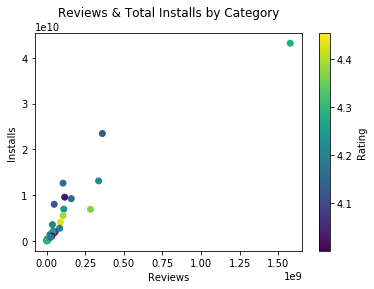

In [20]:
plt.scatter(result3['Reviews'],result3['Installs'],c=result3['Rating'])
clb = plt.colorbar()
plt.xlabel("Reviews")
plt.ylabel("Installs")
clb.set_label("Rating")
plt.title('Reviews & Total Installs by Category',y=1.05)
plt.show()

In [21]:
plt.savefig("Results/Reviews & Installs by Category.png")

<Figure size 432x288 with 0 Axes>

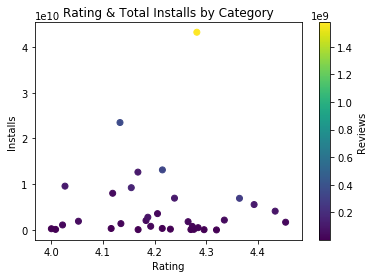

In [22]:
plt.scatter(result3['Rating'],result3['Installs'],c=result3['Reviews'])
clb = plt.colorbar()
plt.xlabel("Rating")
plt.ylabel("Installs")
clb.set_label("Reviews")
plt.title('Rating & Total Installs by Category')
plt.show()

In [23]:
plt.savefig("Results/Rating & Installs by Category.png")

<Figure size 432x288 with 0 Axes>

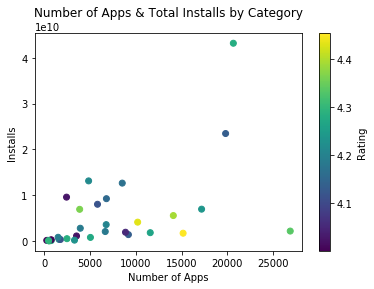

In [24]:
plt.scatter(result3['Number of Apps'],result3['Installs'],c=result3['Rating'])
clb = plt.colorbar()
plt.xlabel("Number of Apps")
plt.ylabel("Installs")
clb.set_label("Rating")
plt.title('Number of Apps & Total Installs by Category',y=1.05)
plt.show()

In [25]:
plt.savefig("Results/Number of Apps & Installs by Category.png")

<Figure size 432x288 with 0 Axes>

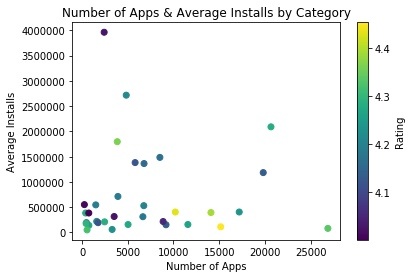

In [26]:
plt.scatter(result3['Number of Apps'],result3['Average Installs Per App'],c=result3['Rating'])
clb = plt.colorbar()
plt.xlabel("Number of Apps")
plt.ylabel("Average Installs")
clb.set_label("Rating")
plt.title('Number of Apps & Average Installs by Category')
plt.show()

In [27]:
plt.savefig("Results/Number of Apps & Average Installs by Category.png")

<Figure size 432x288 with 0 Axes>

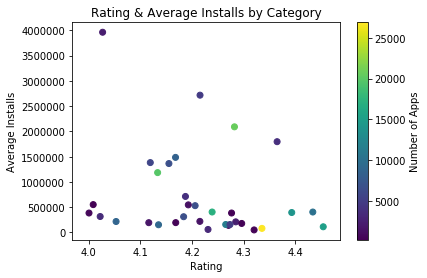

In [28]:
plt.scatter(result3['Rating'],result3['Average Installs Per App'],c=result3['Number of Apps'])
clb = plt.colorbar()
plt.xlabel("Rating")
plt.ylabel("Average Installs")
clb.set_label("Number of Apps")
plt.title('Rating & Average Installs by Category')
plt.show()

In [29]:
plt.savefig("Results/Rating & Average Installs by Category.png")

<Figure size 432x288 with 0 Axes>

APP ANALYSIS BY CATEGORY

In [30]:
apps=cleaned_df1.groupby(["Category"])
review_category=apps["Reviews"].sum()/1000

In [31]:
category_key=apps.groups.keys()

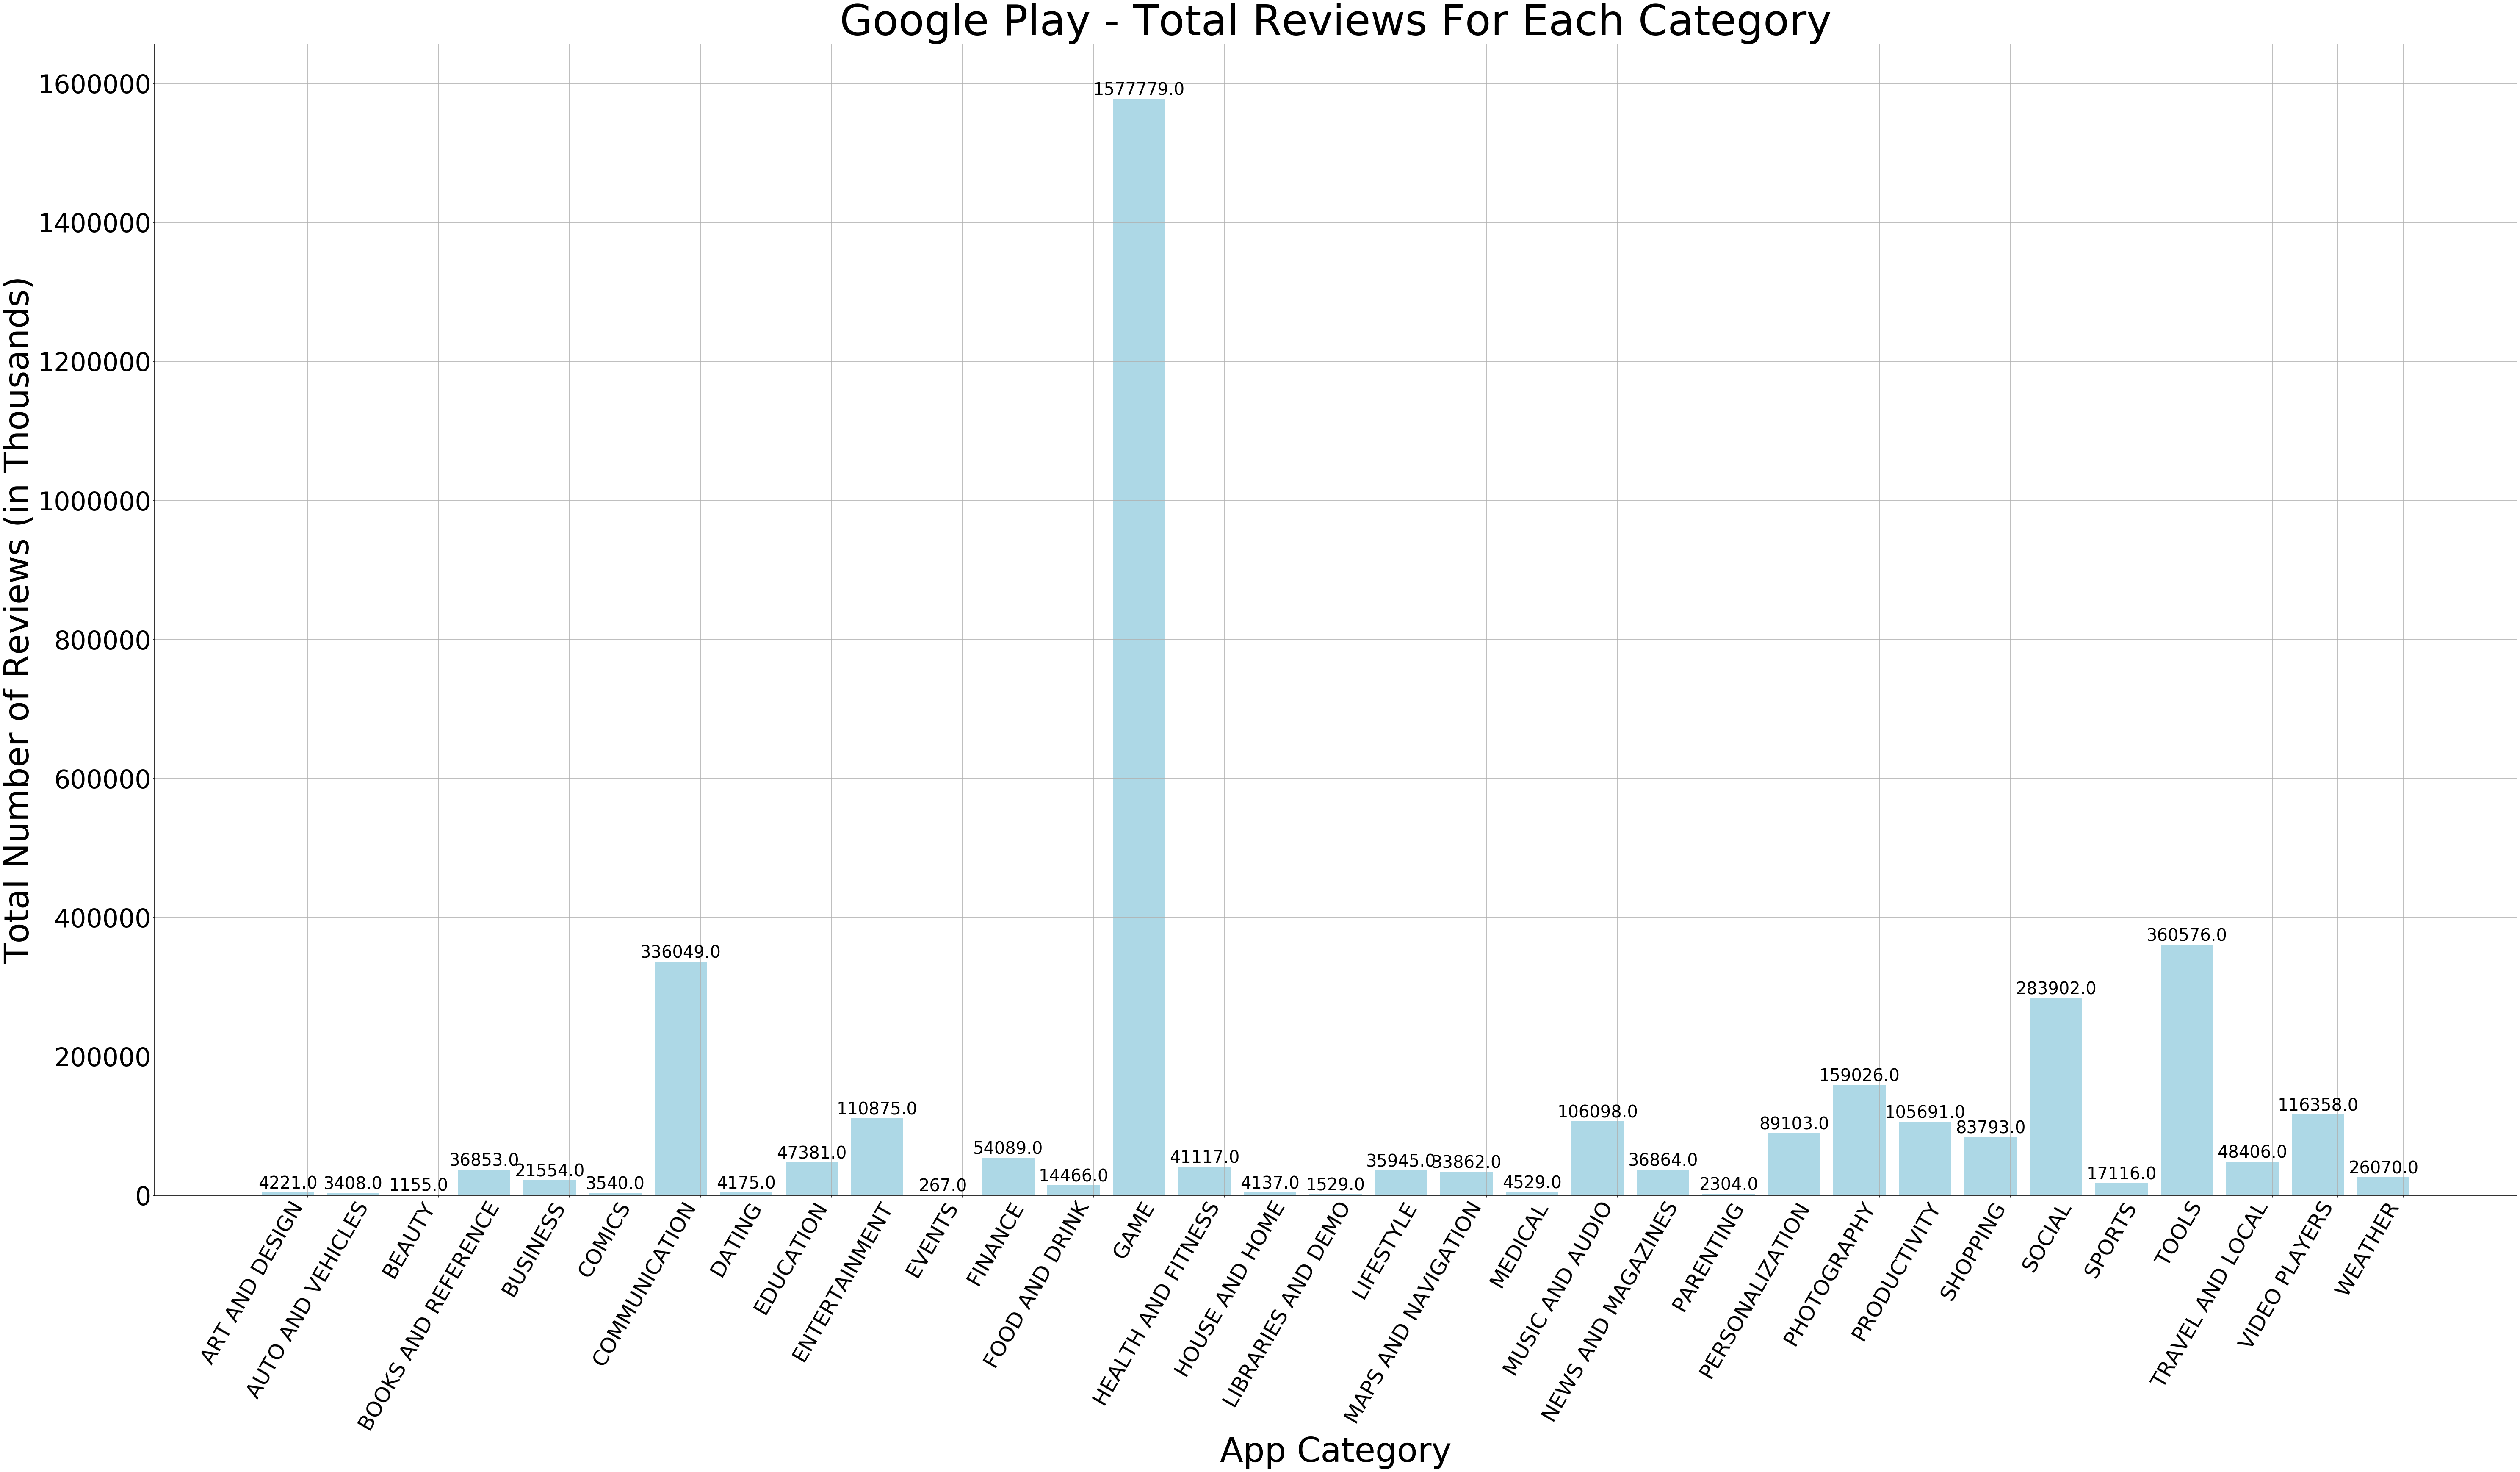

In [32]:
fig, ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(apps["Reviews"]))  
total_review = ax.bar(x_index[0:], review_category[0:], color='lightblue')
ax.set_title('Google Play - Total Reviews For Each Category',fontsize=100)
ax.set_ylabel('Total Number of Reviews (in Thousands)',fontsize=80)
ax.set_xlabel('App Category',fontsize=80)
ax.set_xticks(x_index+0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(category_key,fontsize=50)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
def label(numbers,fontsize,labelheight,roundnumber):
    for x in numbers:
        height = x.get_height()
        xloc=x.get_x() + x.get_width() / 2
        label=(f'{round(height,roundnumber)}')
        ax.text(xloc,height+labelheight,label,ha='center', va='bottom',color="black",fontsize=fontsize)
label(total_review,40,100,0)

In [33]:
fig.savefig("Results/Category vs. Total Review.png")

In [34]:
avg_rating=apps["Rating"].mean()

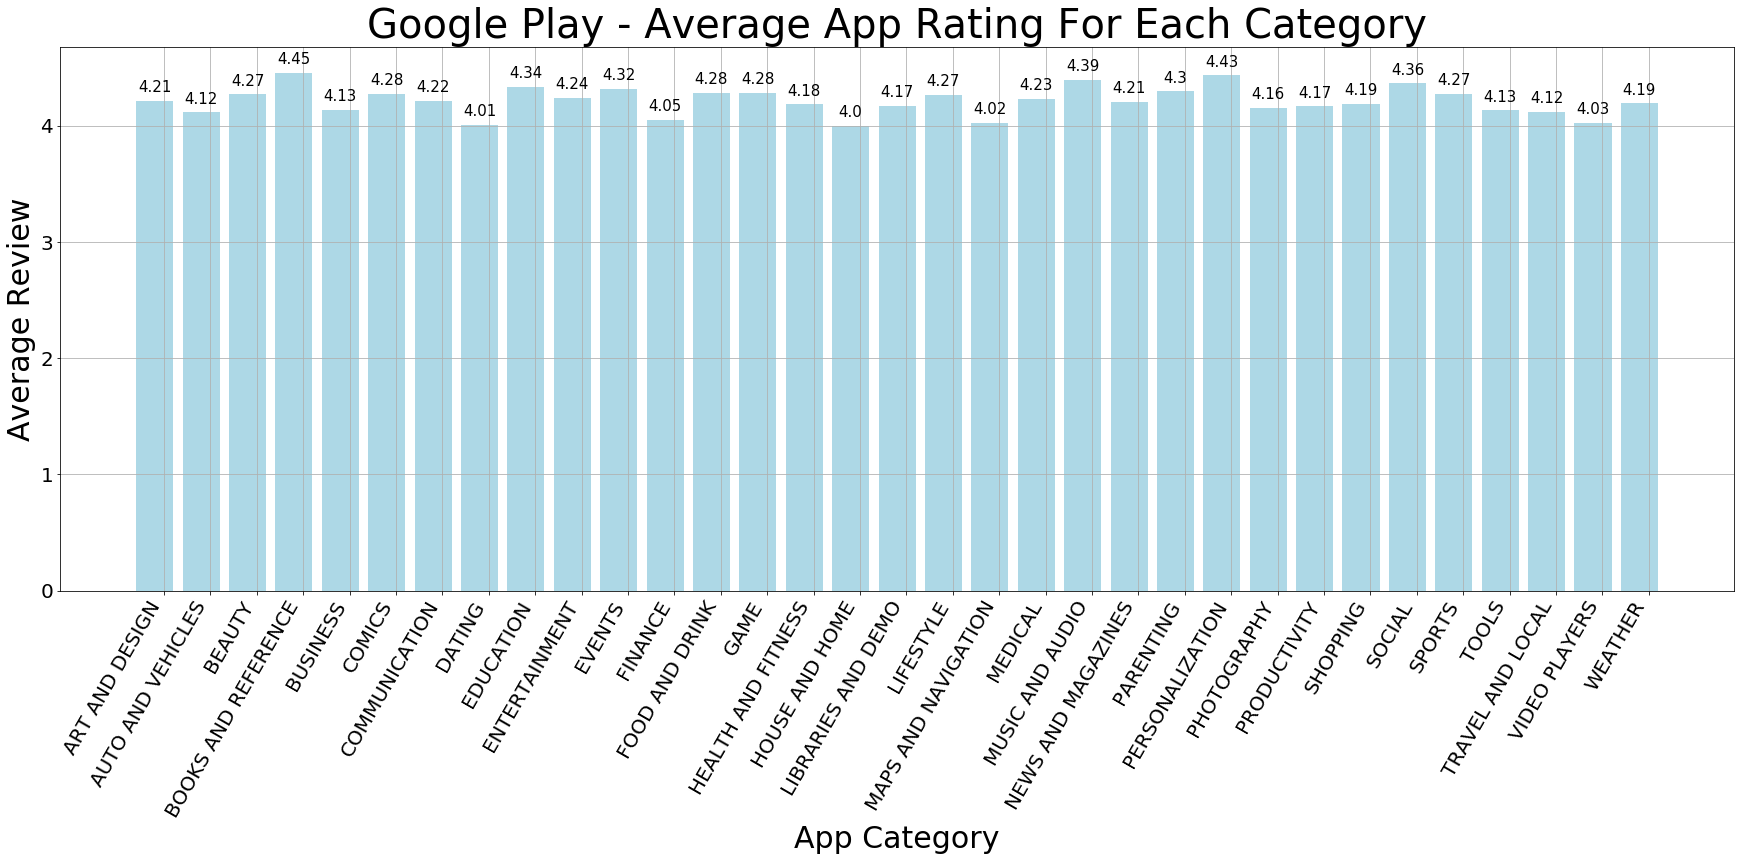

In [35]:
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(apps["Rating"]))  
avg_rating1 = ax.bar(x_index[0:], avg_rating[0:], color='lightblue')
ax.set_title('Google Play - Average App Rating For Each Category',fontsize=40)
ax.set_ylabel('Average Review',fontsize=30)
ax.set_xlabel('App Category',fontsize=30)
ax.set_xticks(x_index+0.2)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(category_key,fontsize=20)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(avg_rating1,15,0.05,2)

In [36]:
fig.savefig("Results/Category vs. Agv Rating.png")

In [37]:
groupby1 = cleaned_df1.groupby(["Category"])
install_sum1 = groupby1["Installs"].sum()/10000

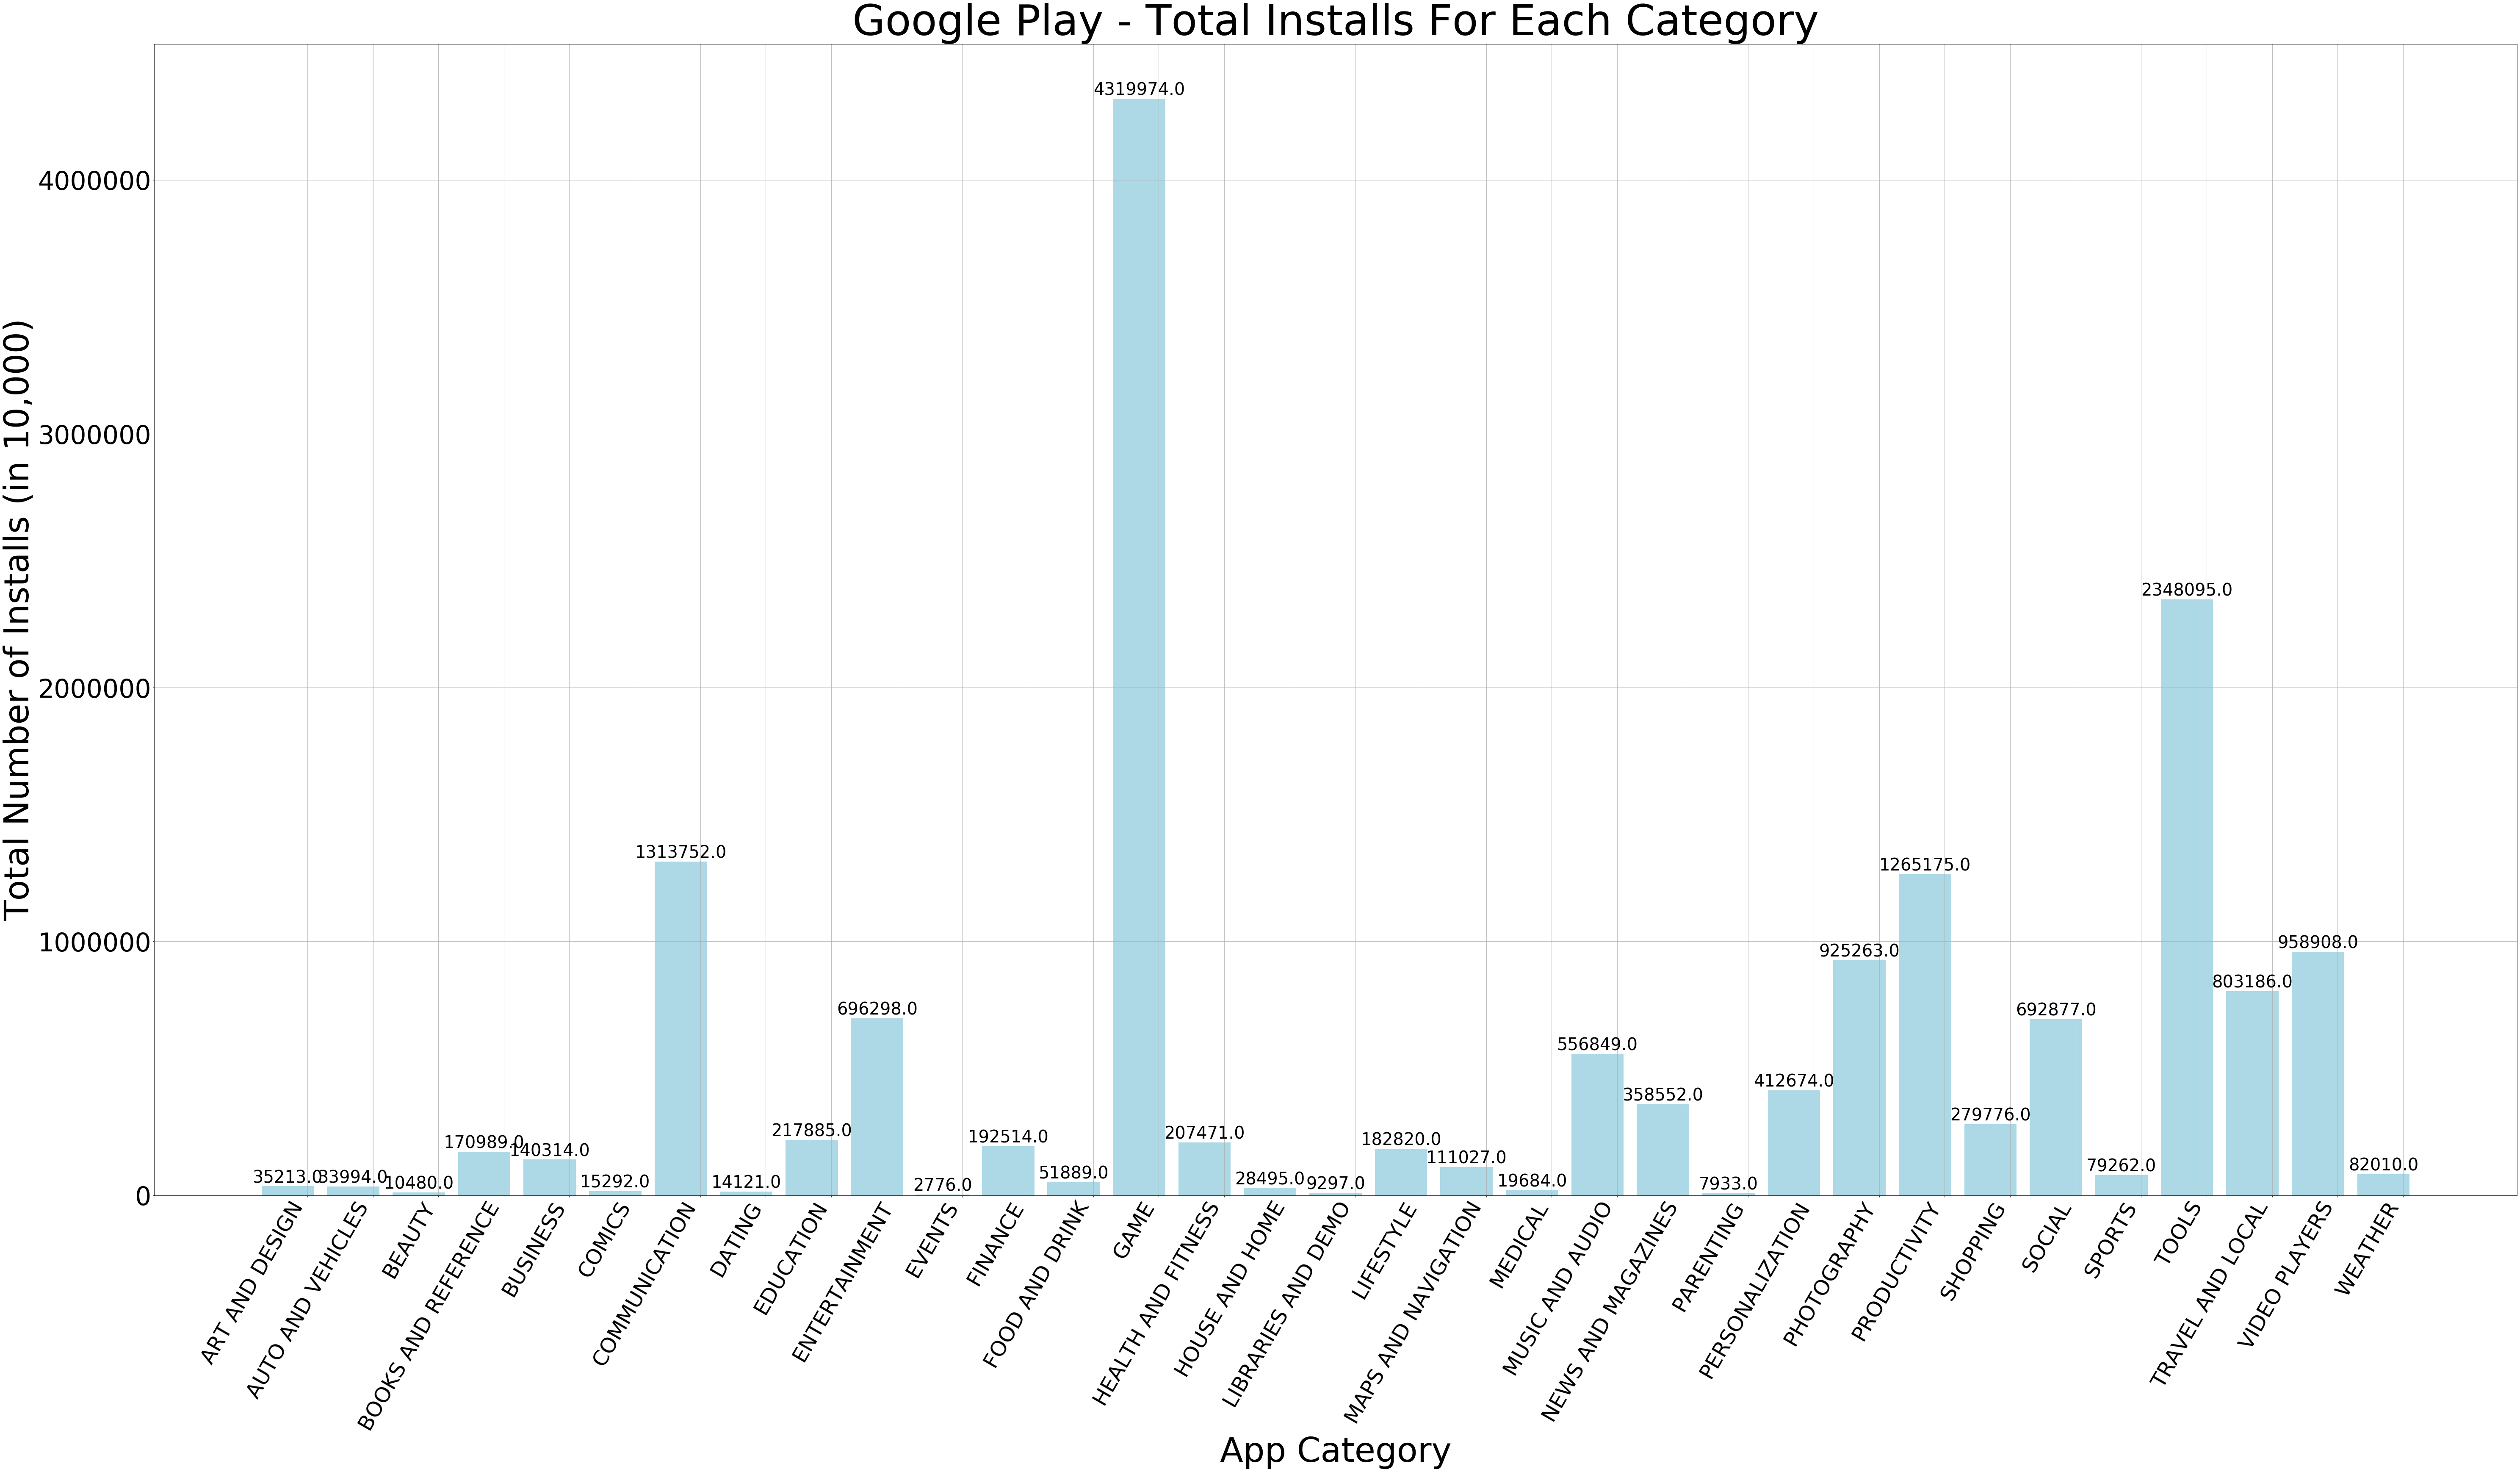

In [38]:
fig,ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(groupby["Installs"]))  
total_installs = ax.bar(x_index[0:], install_sum1[0:], color='lightblue')
ax.set_title('Google Play - Total Installs For Each Category',fontsize=100)
ax.set_ylabel('Total Number of Installs (in 10,000)',fontsize=80)
ax.set_xlabel('App Category',fontsize=80)
ax.set_xticks(x_index+0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(category_key,fontsize=50)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(total_installs,40,100,0)

In [39]:
fig.savefig("Results/Category vs. Total Installs.png")

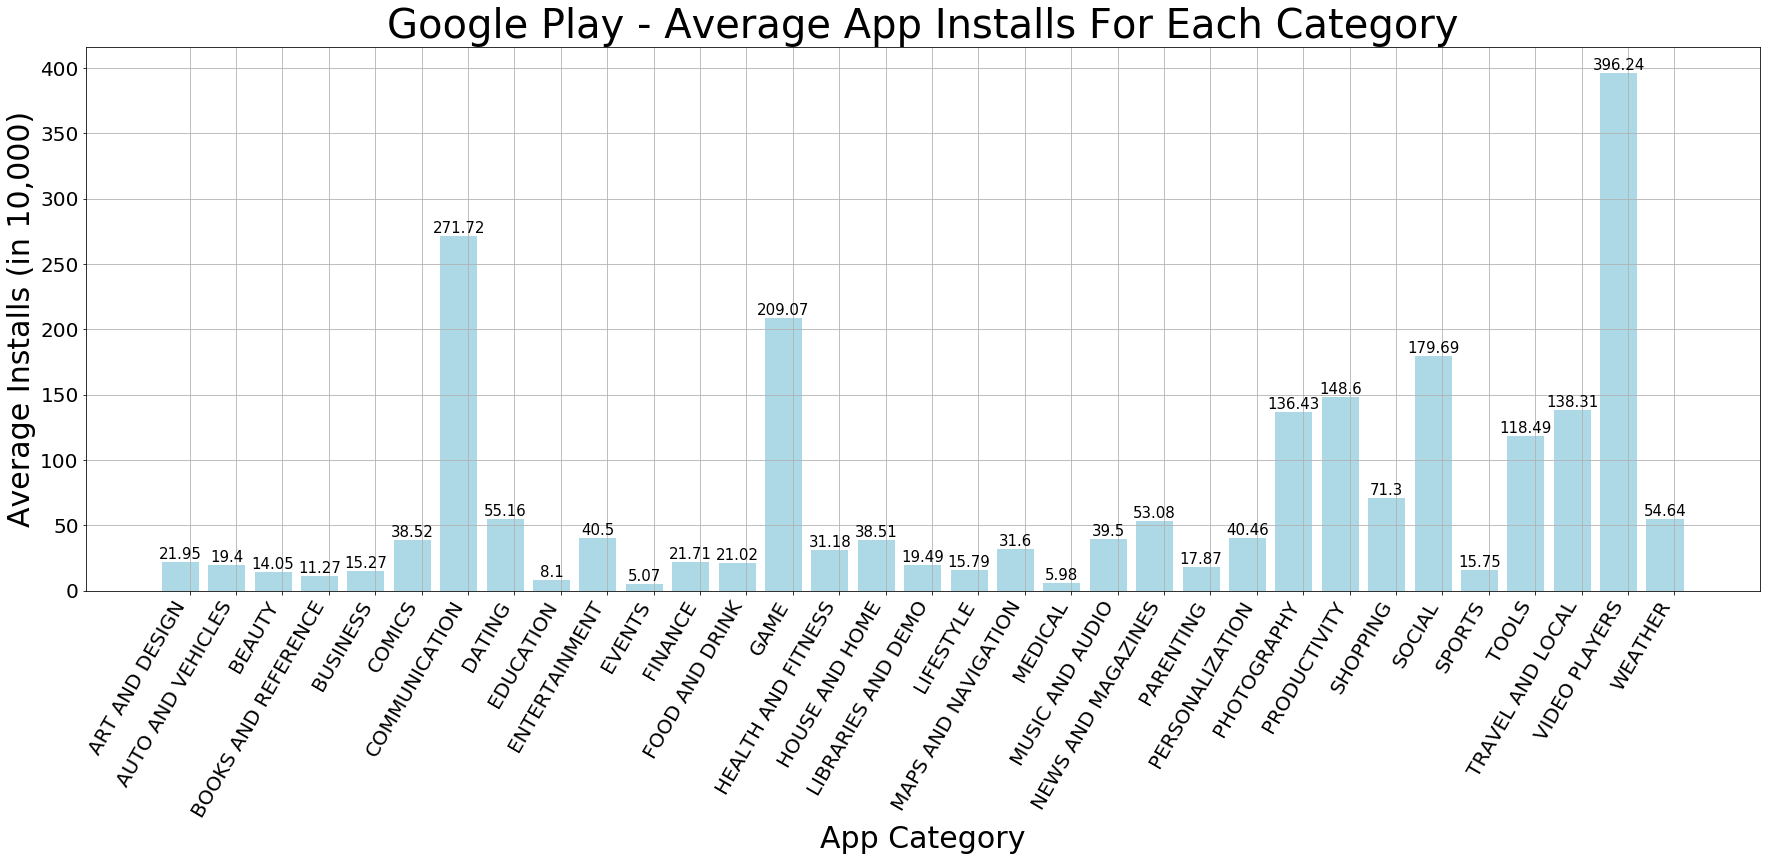

In [40]:
category_count = groupby1["App Name"].count()
average_installs = install_sum1/category_count
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(average_installs))  
avg_installs = ax.bar(x_index[0:], average_installs[0:], color='lightblue')
ax.set_title('Google Play - Average App Installs For Each Category',fontsize=40)
ax.set_ylabel('Average Installs (in 10,000)',fontsize=30)
ax.set_xlabel('App Category',fontsize=30)
ax.set_xticks(x_index+0.2)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(category_key,fontsize=20)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(avg_installs,15,0.05,2)

In [41]:
fig.savefig("Results/Category vs. Average Installs.png")

In [42]:
paid_app=cleaned_df1[cleaned_df1["Price"]!=0]
free_app=cleaned_df1[cleaned_df1["Price"]==0]
free_count=free_app["App Name"].count()
paid_count=paid_app["App Name"].count()
free_install=free_app["Installs"].sum()
paid_install=paid_app["Installs"].sum()
avg_install_free=free_install/free_count
avg_install_paid=paid_install/paid_count

In [43]:
#Take out Google & YouTube
cleaned_df3=cleaned_df2
cleaned_df3=cleaned_df3[cleaned_df3["App Name"] != 'Google']
cleaned_df3=cleaned_df3[cleaned_df3["App Name"] != 'YouTube']
groupby2 = cleaned_df3.groupby(["Category"])
install_sum2 = groupby2["Installs"].sum()/10000
average_installs1= install_sum2/category_count

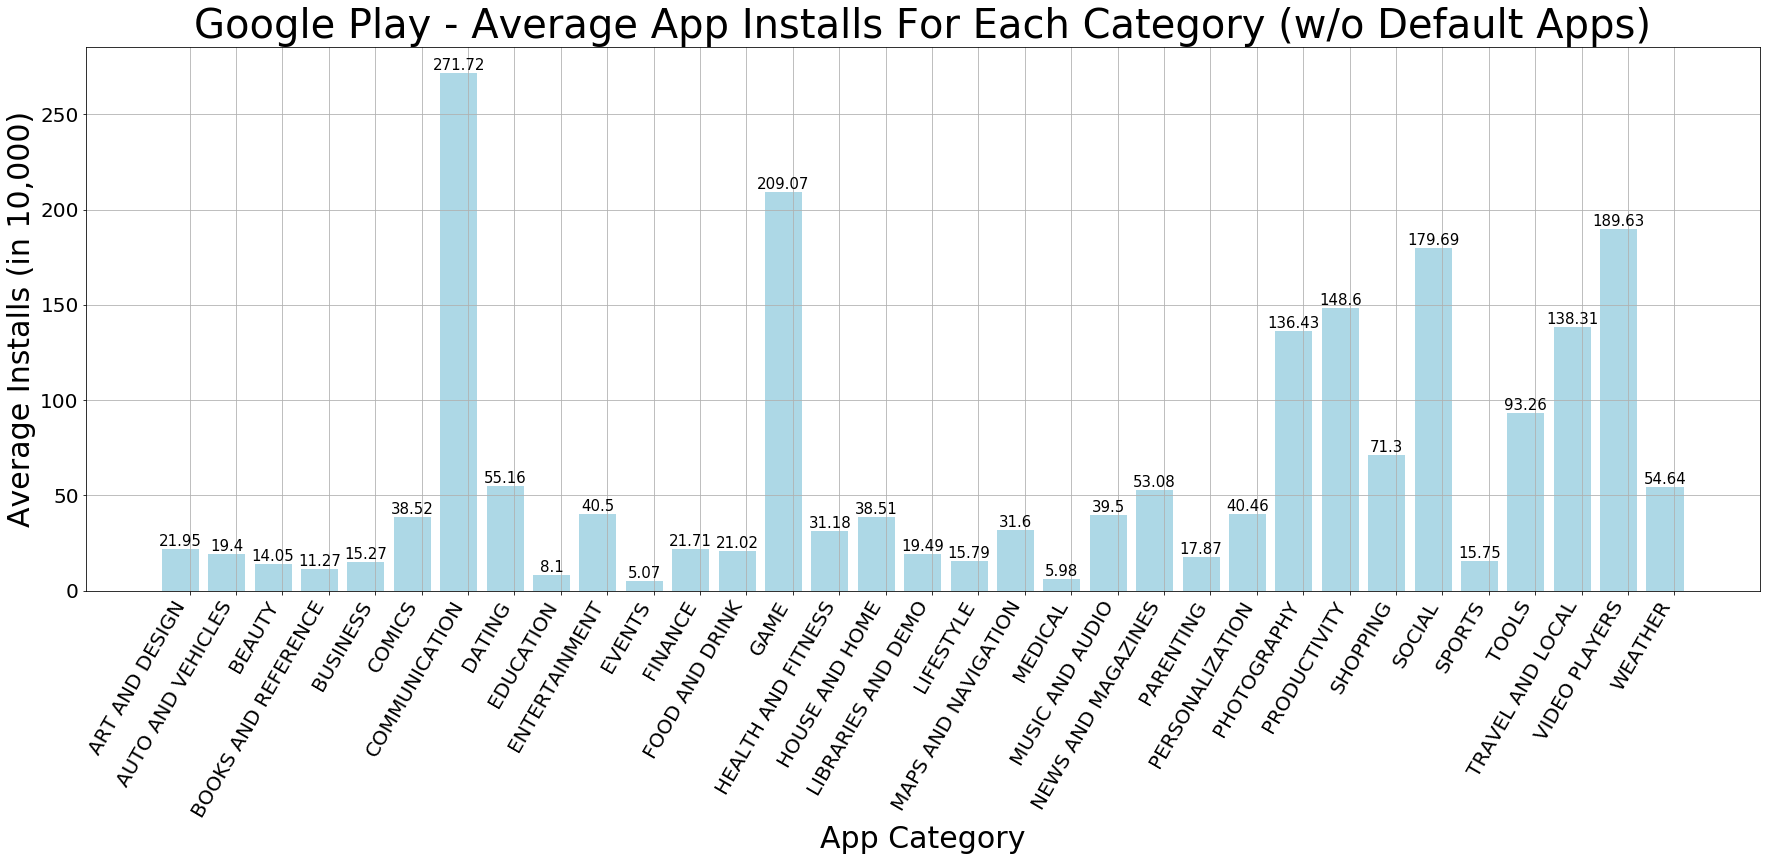

In [44]:
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(average_installs1))  
avg_installs = ax.bar(x_index[0:], average_installs1[0:], color='lightblue')
ax.set_title('Google Play - Average App Installs For Each Category (w/o Default Apps)',fontsize=40)
ax.set_ylabel('Average Installs (in 10,000)',fontsize=30)
ax.set_xlabel('App Category',fontsize=30)
ax.set_xticks(x_index+0.2)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(category_key,fontsize=20)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(avg_installs,15,0.05,2)

In [ ]:
fig.savefig("Results/Category vs. Average Installs (no Default Apps).png")

In [47]:
install_median1 = groupby1["Installs"].median()
install_median1

Category
ART AND DESIGN           5000.0
AUTO AND VEHICLES        5000.0
BEAUTY                  10000.0
BOOKS AND REFERENCE     10000.0
BUSINESS                 1000.0
COMICS                  50000.0
COMMUNICATION           10000.0
DATING                  10000.0
EDUCATION                5000.0
ENTERTAINMENT           10000.0
EVENTS                   1000.0
FINANCE                 10000.0
FOOD AND DRINK           5000.0
GAME                   100000.0
HEALTH AND FITNESS      10000.0
HOUSE AND HOME           5000.0
LIBRARIES AND DEMO       5000.0
LIFESTYLE               10000.0
MAPS AND NAVIGATION     10000.0
MEDICAL                  5000.0
MUSIC AND AUDIO         10000.0
NEWS AND MAGAZINES      10000.0
PARENTING               10000.0
PERSONALIZATION         10000.0
PHOTOGRAPHY             50000.0
PRODUCTIVITY            10000.0
SHOPPING                10000.0
SOCIAL                  10000.0
SPORTS                  10000.0
TOOLS                   10000.0
TRAVEL AND LOCAL        10000.0

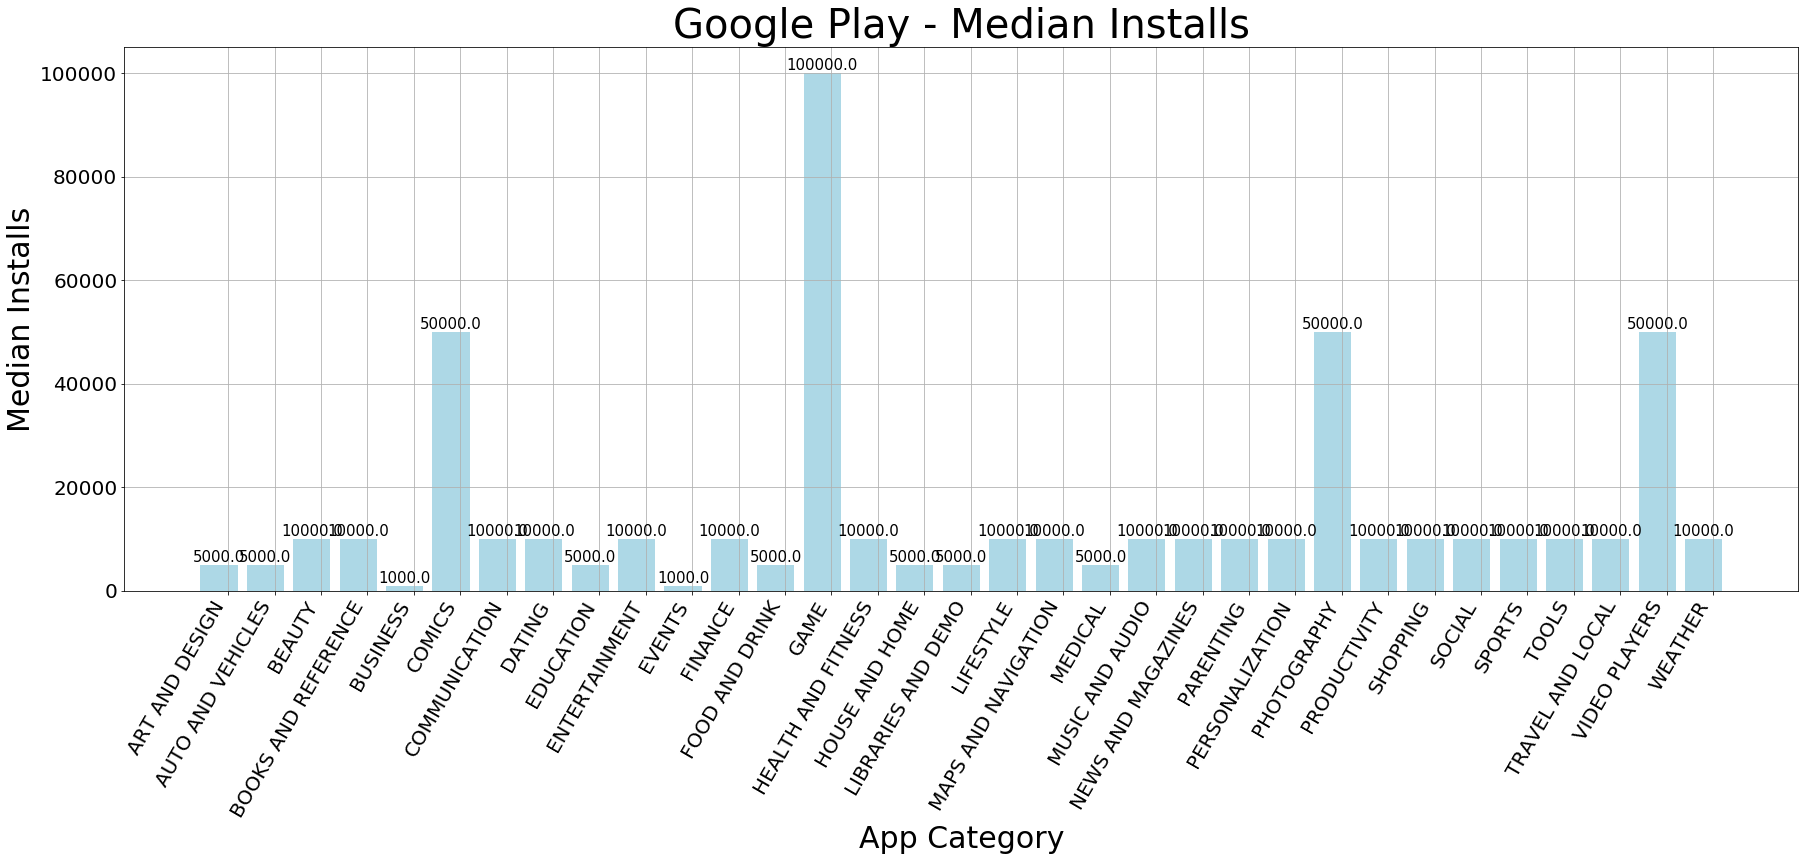

In [54]:
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(install_median1))  
install_med = ax.bar(x_index[0:], install_median1[0:], color='lightblue')
ax.set_title('Google Play - Median Installs',fontsize=40)
ax.set_ylabel('Median Installs',fontsize=30)
ax.set_xlabel('App Category',fontsize=30)
ax.set_xticks(x_index+0.2)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(category_key,fontsize=20)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(install_med,15,0.05,2)

In [ ]:
fig.savefig("Results/Category vs. Median Installs.png")

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
x_index = (np.arange(2))  
y_index=(avg_install_free,avg_install_paid)
price_install= ax.bar(x_index[0:], y_index[0:], color='lightblue',width=0.5)
ax.set_title('Google Play - Average Installs for Paid Apps and Free Apps',fontsize=15)
ax.set_ylabel('Average Installs',fontsize=15)
ax.set_xlabel('App Type',fontsize=15)
ax.set_xticks(x_index)
ax.set_ylim([0, 820000])
ax.tick_params(axis="y", labelsize=10)
ax.set_xticklabels(["Free App","Paid App"],fontsize=10)
ax.yaxis.grid(True)
label(price_install,12,5000,0)

In [ ]:
fig.savefig("Results/Price vs. Total Install.png")

GAME APP ANALYSIS

In [ ]:
game_df= cleaned_df
game_df=game_df[game_df['Category'].str.contains('GAME', regex=False)]
game_df.head()

In [ ]:
game_sub=game_df.groupby("Category")
game_review=game_sub["Reviews"].sum()/1000
game_key=game_sub.groups.keys()
game_app_count=game_sub["App Name"].count()
game_install_sum=game_sub["Installs"].sum()/1000
game_install_avg=game_sub["Installs"].sum()/game_app_count

In [ ]:
fig, ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(game_sub["Rating"]))  
game_total_review = ax.bar(x_index[0:], game_review[0:], color='lightblue')
ax.set_title('Google Play - Total Reviews For Each Game Sub-category',fontsize=100)
ax.set_ylabel('Total Number of Reviews (in 1,000)',fontsize=80)
ax.set_xlabel('Game App Category',fontsize=80)
ax.set_xticks(x_index-0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(game_key,fontsize=50,rotation=60)
ax.grid(True)
label(game_total_review,60,100,0)

In [ ]:
fig.savefig("Results/Game Category vs. Total Review.png")

In [ ]:
game_avg_rating=game_sub["Rating"].mean()

In [ ]:
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(game_sub["Rating"]))  
game_avg_rating1 = ax.bar(x_index[0:], game_avg_rating[0:], color='lightblue')
ax.set_title('Google Play - Average Rating For Each Game Sub-category',fontsize=35)
ax.set_ylabel('Average Review',fontsize=30)
ax.set_xlabel('Game App Category',fontsize=30)
ax.set_xticks(x_index+0.2)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(game_key,fontsize=20)
plt.xticks(rotation=40, ha='right')
ax.grid(True)
label(game_avg_rating1,15,0.05,2)

In [ ]:
fig.savefig("Results/Game Category vs. Avg Reviw.png")

In [ ]:
fig,ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(game_sub["Installs"]))  
total_installs_game = ax.bar(x_index[0:], game_install_sum[0:], color='lightblue')
ax.set_title('Google Play - Total Installs For Each Game Sub-category',fontsize=100)
ax.set_ylabel('Total Number of Installs (in 1,000)',fontsize=80)
ax.set_xlabel('Game App Category',fontsize=80)
ax.set_xticks(x_index+0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(game_key,fontsize=50)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(total_installs_game,50,100,0)

In [ ]:
fig.savefig("Results/Game Category vs. Total Installs.png")

In [ ]:
fig,ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(game_install_avg))  
avg_installs_game = ax.bar(x_index[0:], game_install_avg[0:], color='lightblue')
ax.set_title('Google Play - Average Installs For Each Category (Game)',fontsize=100)
ax.set_ylabel('Average Number of Installs',fontsize=80)
ax.set_xlabel('Game App Category',fontsize=80)
ax.set_xticks(x_index+0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(game_key,fontsize=50)
plt.xticks(rotation=60, ha='right')
ax.grid(True)
label(avg_installs_game,55,1000,0)

In [ ]:
fig.savefig("Results/Game Category vs. Average Installs.png")

In [ ]:
paid_game_app=game_df[game_df["Price"]!=0]
free_game_app=game_df[game_df["Price"]==0]
free_game_count=free_game_app["App Name"].count()
paid_game_count=paid_game_app["App Name"].count()
free_game_install=free_game_app["Installs"].sum()
paid_game_install=paid_game_app["Installs"].sum()
avg_install_free_game=free_game_install/free_game_count
avg_install_paid_game=paid_game_install/paid_game_count

In [ ]:
fig,ax = plt.subplots(figsize=(6,5))
x_index = (np.arange(2))  
y_index=(avg_install_free_game,avg_install_paid_game)
game_price_install= ax.bar(x_index[0:], y_index[0:], color='lightblue',width=0.5)
ax.set_title('Google Play - Average Installs for Paid Apps and Free Apps (Game)',fontsize=15)
ax.set_ylabel('Average Installs',fontsize=15)
ax.set_xlabel('App Type',fontsize=15)
ax.set_xticks(x_index)
ax.set_ylim([0, 2800000])
ax.tick_params(axis="y", labelsize=10)
ax.set_xticklabels(["Free App","Paid App"],fontsize=10)
ax.yaxis.grid(True)
label(game_price_install,13,50000,0)

In [ ]:
fig.savefig("Results/Game: Price vs. Total Install.png")